In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
import nltk
%matplotlib inline
import re
import os

In [2]:
path = os.getcwd()
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']
files_xls

['21Feb.xlsx']

In [3]:
df = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel(f, encoding = "utf_8")
    df = df.append(data)

In [4]:
#df.to_json("dff.json",orient='split')

In [4]:
data = df[["text", "user_name", "lang"]]

In [5]:
data_en = data[data["lang"] == "en"]

In [6]:
data_en.shape

(7039, 3)

In [7]:
data_en = data_en.drop_duplicates()

In [8]:
data_en.shape

(6987, 3)

In [9]:
type(data["text"].iloc[1])

unicode

In [10]:
from nltk import word_tokenize
nltk.word_tokenize(data_en["text"].iloc[1])

[u'@',
 u'BLRrocKS',
 u'@',
 u'mepratap',
 u'Thimma',
 u'u',
 u'have',
 u'to',
 u'suffer..',
 u'no',
 u'way']

In [11]:
#data_en["text"][555]

In [12]:
#def custom_tokenize(text):
    #if not text:
        #print('The text to be tokenized is a None type. Defaulting to blank string.', text)
        #text = ''
    #return word_tokenize(text)
#data_en['tokenized_column'] = data_en.text.apply(custom_tokenize)

In [13]:
#total_text = []
#for i in range(0, len(data_en)):
    #txet = data_en["text1"].iloc[i]
    #total_text.append(txet)

In [14]:
#total

In [15]:
# total = []
# for text in total_text:
#     total.append(clean_text(text))  

In [16]:
index = data_en.index[data_en["text"] == 0]
index

Int64Index([], dtype='int64')

In [17]:
data_en = data_en.drop(index= index)
#data_en[data_en["text"] == 0]

In [18]:
from nltk.corpus import stopwords

In [19]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [20]:
def clean_text(text, remove_stopwords = True):
    text = text.lower()
    
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        
        
        text = " ".join(new_text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', '', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\'""', '', text)
    text = text.replace('‘', '').strip()
    text = text.replace('’', '').strip()
    

    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

In [21]:
data_en["text1"] = data_en["text"].apply(lambda x: clean_text(x.encode('utf-8')))

In [22]:
data_en["text1"]

1001    kabburbull vidwathv wallstreet4modi hari prasa...
1002                blrrocks mepratap thimma u suffer way
1003    blrrocks abhijitmajumder mepratap u cc cm kara...
1004    dipankar cpiml boss ur logic congress never ev...
1005    dp satish gok knew nothing simply congis drama...
1006    blrrocks narendramodi even bf hero meti gets f...
1007    divyaspandana manke nowadays ur talking much n...
1008    immak02 divyaspandana sanjaynirupam incmumbai ...
1009    dineshgrao manoharparrikar narendramodi cmofka...
1010    divyaspandana bjp4india iyc bjp difficult acco...
1011    meenabg fake news 420brigade madam started bjp...
1012                divyaspandana aakar amnesty try manke
1013    inckarnataka dineshgrao amitshah incindia bjp4...
1014                         sagenaradamuni effort congis
1015    vijaykarnataka feel bad congis iam sure congis...
1016    ajavgal pmoindia narendramodi guru think abt c...
1017    ajavgal surnell shaksingh sir swalpa practical...
1018    ajavga

In [25]:
total = list(data_en["text1"])

In [26]:
total

['kabburbull vidwathv wallstreet4modi hari prasadkk u might hv 1000s evidence without facts scientific bkg better start reading science rather history lk ppls migration',
 'blrrocks mepratap thimma u suffer way',
 'blrrocks abhijitmajumder mepratap u cc cm karanataka others dineshgrao right',
 'dipankar cpiml boss ur logic congress never ever form government',
 'dp satish gok knew nothing simply congis drama next target guess',
 'blrrocks narendramodi even bf hero meti gets fir wts big deal bail',
 'divyaspandana manke nowadays ur talking much nd crossing ur limits give complaint officeofrg abt position ur tlking like dis',
 'immak02 divyaspandana sanjaynirupam incmumbai inckarnataka tehseenp jhasanjay shehzad ind incnavimumbai worst bangalore place ka cm hv mutton chaps mudde nice sleep',
 'dineshgrao manoharparrikar narendramodi cmofkarnataka bsybjp sg told goa ppls 2007 election campaign',
 'divyaspandana bjp4india iyc bjp difficult accommodate bjp campaign team bcoz congis r compet

In [27]:
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [28]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(total)
tf_feature_names = tf_vectorizer.get_feature_names()

In [29]:
tf_feature_names

[u'00',
 u'000',
 u'000cr',
 u'01',
 u'02',
 u'04',
 u'05',
 u'06',
 u'07',
 u'08',
 u'080',
 u'08251232087',
 u'10',
 u'100',
 u'1000',
 u'10000',
 u'1000cr',
 u'100s',
 u'1016704167',
 u'1070',
 u'10k',
 u'10th',
 u'11',
 u'1107049973',
 u'1127370813',
 u'118',
 u'11am',
 u'11th',
 u'12',
 u'120',
 u'120crorehindus',
 u'125',
 u'127',
 u'129',
 u'12th',
 u'13',
 u'135',
 u'13th',
 u'14',
 u'1428',
 u'14th',
 u'15',
 u'150',
 u'1500',
 u'1527',
 u'156',
 u'15th',
 u'16',
 u'168',
 u'17',
 u'175',
 u'18',
 u'18th',
 u'19',
 u'1947',
 u'1949',
 u'1950',
 u'198',
 u'1985',
 u'1992',
 u'1995',
 u'1996',
 u'1st',
 u'20',
 u'200',
 u'2000',
 u'20000',
 u'2001',
 u'2002',
 u'2004',
 u'2007',
 u'2009',
 u'2010',
 u'2011',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'2018',
 u'2019',
 u'2025',
 u'21',
 u'22',
 u'22340676',
 u'224',
 u'22nd',
 u'23',
 u'2300',
 u'24',
 u'25',
 u'25th',
 u'26',
 u'269',
 u'27',
 u'28',
 u'28th',
 u'29',
 u'29000',
 u'29th',
 u'2day',
 u'2g',
 u

In [30]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [31]:
no_topics = 20
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


/usr/local/lib/python2.7/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [32]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 6
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
news make school kannada main narendramodi
Topic 1:
city watch garbage bbmpadmn divyaspandana children
Topic 2:
bengaluru speech seats vote forget namo
Topic 3:
scam super sweet near rsprasad card
Topic 4:
vishwavani à² timely ವವ à³ ವರಭಟ
Topic 5:
want congratulations real hai ðÿž away
Topic 6:
malviyamit mla sureshnakhua anupamagrawal16 wants pmadhwaraj
Topic 7:
ðÿ divyaspandana day rahulkanwal india happy
Topic 8:
bjp cmofkarnataka bengaluru good bbmp siddaramaiah
Topic 9:
sad hear anupampkher join bharat watching
Topic 10:
siddaramaiah bjp people dineshgrao congress like
Topic 11:
gujarat sukanyaiyer2 ankitasood13 rajamaka ashishmerkhed aashish81us
Topic 12:
divyaspandana gandhi indian nice rahul officeofrg
Topic 13:
hav paytmcare available product boy ramesh
Topic 14:
film end divya list hey agenda
Topic 15:
narendramodi sir india karnataka divyaspandana amitshah
Topic 16:
vishweshwarbhat politicians fadnavis dev think understand
Topic 17:
updates tvmohandaspai action chang

In [33]:
no_topics = 30
lda1 = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

/usr/local/lib/python2.7/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [34]:
no_top_words = 10
display_topics(lda1, tf_feature_names, no_top_words)

Topic 0:
school going fadnavis dev narendramodi foundation amitshah ashishmerkhed bjp4maharashtra cmomaharashtra
Topic 1:
congratulations watch dat screen films language ðÿž 20 level miss
Topic 2:
video awesome amazing vijayrupanibjp words nanditathhakur hardikpatel bhav2406 dhaval8456 sureshnakhua
Topic 3:
gst high long available schools mysore train wud bharat product
Topic 4:
aap arvindkejriwal gets house divyaspandana situation hi tv watching lady
Topic 5:
à² divyaspandana world new ur à³ abt women proud scheme
Topic 6:
malviyamit big sureshnakhua sukanyaiyer2 hai real aashish81us narendramodi ankitasood13 ashishmerkhed
Topic 7:
rahulkanwal indiatoday ndtv bdutt superb paid nahi aajtak program paytm
Topic 8:
divyaspandana bangalore nice true ind anupampkher ka join bengaluru whats
Topic 9:
way rest present gr8 escape aft haha mall dharam suffer
Topic 10:
narendramodi bjp siddaramaiah karnataka sir congress people like modi officeofrg
Topic 11:
rssurjewala shainanc bhavikpatelbjp pr

In [35]:
no_topics = 10
lda2 = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


/usr/local/lib/python2.7/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [36]:
no_top_words = 10
display_topics(lda2, tf_feature_names, no_top_words)

Topic 0:
mepratap vishwavani à² news narendramodi timely vishweshwarbhat malviyamit amitshah ವವ
Topic 1:
divyaspandana narendramodi india pm good arunjaitley pmoindia congratulations great sir
Topic 2:
says rt available bengaluru iamrahulrane product feel superb donate mandatory
Topic 3:
movie dear sad watch hear police long shashitharoor pls sushmaswaraj
Topic 4:
bengaluru bbmpadmn updates bbmp road new monday water delhi rs
Topic 5:
want narendramodi pls happy wish dear speech bangalore sir sunday
Topic 6:
ðÿ congrats man thanks divyaspandana let change help sir common
Topic 7:
people sir narendramodi karnataka modi day like siddaramaiah govt state
Topic 8:
bjp siddaramaiah congress cmofkarnataka bsybjp dineshgrao officeofrg incindia govt bjpkarnataka
Topic 9:
thank team public morning respected hubli watching birth tomo winning


In [37]:
users = data_en.groupby('user_name')["text1"].apply(list)

In [38]:
users = users.reset_index()

In [39]:
users["txet"] = users["text1"].apply(lambda x: "".join(str(i) for i in x))

In [40]:
users

,user_name,text1,txet
0,#Isupportmodi,[breakingnews officeofrg rahulgandhi afsos slo...,breakingnews officeofrg rahulgandhi afsos slog...
1,#gangadhar,[narendramodi sir please look karnataka cauver...,narendramodi sir please look karnataka cauvery...
2,ABM Ramanagara,"[mirchilavanya happy monday, narendramodi mehb...",mirchilavanya happy mondaynarendramodi mehboob...
3,Abhaykashyap fan primeminster of mr Narendra modi,[shahnawazbjp narendramodi arunjaitley good de...,shahnawazbjp narendramodi arunjaitley good dec...
4,Abhishek Bhaskara,[bjp4india bjprajnathsingh narendramodi addres...,bjp4india bjprajnathsingh narendramodi address...
5,Admane Sheshrao A,[good morning],good morning
6,Alok Rai,[kpcckarnataka karnatakacm karnatakacom karrna...,kpcckarnataka karnatakacm karnatakacom karrnat...
7,Anand Shivaram,[divyaspandana ashamed ashamed say tat state n...,divyaspandana ashamed ashamed say tat state na...
8,Anurag Naidu,[sunnyleone timesofindia dont know common prac...,sunnyleone timesofindia dont know common pract...
9,Appu karagar,"[divyaspandana happy new year queen, priyankkh...",divyaspandana happy new year queenpriyankkharg...


In [44]:
df["hashtags"].value_counts()[0:10]

vishwavani,ವಿಶ್ವವಾಣಿ,Timely,news,vishweshwarbhat,ವಿಶ್ವೇಶ್ವರಭಟ್    37
Bengaluru                                                         35
bbmppolls                                                         20
NavaKarnatakaNirmana                                              15
bbmp                                                              13
VOTEFORJDS,BETHECHANGE                                             9
BBMP                                                               9
MannKiBaat                                                         8
modi                                                               8
Quoteforlife                                                       7
Name: hashtags, dtype: int64

In [45]:
political = users[users["txet"].str.contains("congress", case = False)| users["txet"].str.contains("inc", case = False)|users["txet"].str.contains("modi", case = False)|users["txet"].str.contains("gandhi", case = False)|users["txet"].str.contains("jds", case = False)|users["txet"].str.contains("cmofkarnataka", case = False)|users["txet"].str.contains("siddaramaiah", case = False)]

In [46]:
congress = ["inc", "cmofkarnataka", "siddaramaiah", "congress", "gandhi"]

In [48]:
# count_congress = 0
# for t in users["txet"]:
#     if "congress" in t or "inc" in t or "cmofkarnataka", "":
#         count_congress += 1

In [49]:
#users["txet"][1].str().unstack()

In [50]:
type(users["txet"][1])

str

In [51]:
from nltk import word_tokenize
users["txet"] = users["txet"].apply(lambda x: word_tokenize(x))

In [52]:
from collections import Counter

In [53]:
users["count"] = users["txet"].apply(lambda x: Counter(x))

In [54]:
#users = users.drop("congress", axis=1)

In [55]:
users["congress"] = 0
users["bjp"] = 0
users["jds"] = 0

In [56]:
# users["bjp"][0] = users["count"][0].get('modi')
    

In [57]:
users["count"][0].get('modi')

8

In [ ]:
# for i in range(0,2350):
#     users["bjp"][i] = users["count"][i].get('modi')

/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
from gensim.models import word2vec

In [59]:
users["txet"][0:10]

0    [breakingnews, officeofrg, rahulgandhi, afsos,...
1    [narendramodi, sir, please, look, karnataka, c...
2    [mirchilavanya, happy, mondaynarendramodi, meh...
3    [shahnawazbjp, narendramodi, arunjaitley, good...
4    [bjp4india, bjprajnathsingh, narendramodi, add...
5                                      [good, morning]
6    [kpcckarnataka, karnatakacm, karnatakacom, kar...
7    [divyaspandana, ashamed, ashamed, say, tat, st...
8    [sunnyleone, timesofindia, dont, know, common,...
9    [divyaspandana, happy, new, year, queenpriyank...
Name: txet, dtype: object

In [62]:
model = gensim.models.Word2Vec(users["txet"], min_count=5)

In [63]:
model.wv.most_similar('condition')

[('guys', 0.9991901516914368),
 ('morning', 0.9991831183433533),
 ('former', 0.9991817474365234),
 ('mysore', 0.9991797208786011),
 ('one', 0.9991679191589355),
 ('indian', 0.9991662502288818),
 ('bjpkarnataka', 0.9991660118103027),
 ('time', 0.9991642236709595),
 ('congress', 0.9991641044616699),
 ('gujarat', 0.9991639852523804)]

In [66]:
congress = model.wv.most_similar('congress', topn =50)

In [67]:
jds = model.wv.most_similar('jds', topn = 50)

In [68]:
modi = model.wv.most_similar('modi', topn = 50)

In [69]:
rahul_gandhi = model.wv.most_similar('rahulgandhi', topn = 50)

In [70]:
gandhi = model.wv.most_similar('gandhi', topn = 50)

In [71]:
siddaramaih = model.wv.most_similar('siddaramaiah', topn=50)

In [72]:
bjp = model.wv.most_similar('bjp', topn=50)

In [73]:
similar_words = pd.DataFrame(
    {'congress': congress,
     'jds': jds,
     'modi': modi,
     'rahul_gandhi': rahul_gandhi,
     'gandhi': gandhi,
     'siddaramaiah': siddaramaih
    })

In [74]:
similar_words1 = pd.DataFrame(
    {'congress': congress,
     'jds': jds,
     'modi': modi,
     'rahul_gandhi': rahul_gandhi,
     'gandhi': gandhi,
     'siddaramaiah': siddaramaih,
     'bjp': bjp
    })

In [75]:
from sklearn.cluster import KMeans

In [76]:
word_vectors = model.wv.vectors

num_clusters = 10

# Initalize a k-means object and use it to extract centroids

kmeans_clustering = KMeans( n_clusters = num_clusters )

idx = kmeans_clustering.fit_predict( word_vectors )

word_centroid_map = list(dict(zip( model.wv.index2word, idx)).values())

#for cluster in range(0,10):

#Print the cluster number
    #print("\nCluster %d" % cluster)

# Find all of the words for that cluster number, and print them out
words = []

#for i in range(0,len(word_centroid_map)):
    #if word_centroid_map[i] == "cluster 0":
        #words.append(word_centroid_map.keys()[i])
        #print(words)

In [77]:
idx

array([7, 7, 7, ..., 5, 5, 5], dtype=int32)

In [78]:
similar_words1.to_excel("similar_words.xlsx")

In [79]:
words = list(model.wv.vocab)

In [80]:
model.save('model.bin')

In [81]:
new_model = gensim.models.Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=2786, size=100, alpha=0.025)


In [82]:
X = model[model.wv.vocab]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

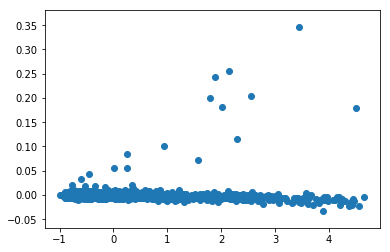

In [85]:
plt.scatter(result[:, 0], result[:, 1])

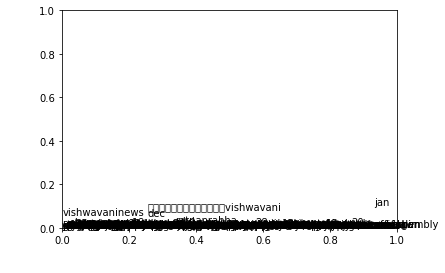

In [95]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word.decode('utf-8','ignore'), xy=(result[i, 0], result[i, 1]))
plt.show()


In [96]:
model.similarity('modi', 'loot')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9975768385744899

In [97]:
model.similarity('modi', 'great')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9999247142070251

In [98]:
political = data_en[data_en["text"].str.contains("congress", case = False)| data_en["text"].str.contains("inc", case = False)|data_en["text"].str.contains("modi", case = False)|data_en["text"].str.contains("gandhi", case = False)|data_en["text"].str.contains("jds", case = False)|data_en["text"].str.contains("cmofkarnataka", case = False)|data_en["text"].str.contains("siddaramaiah", case = False)]

In [92]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model_gog = KeyedVectors.load_word2vec_format(filename, binary=True)

IOError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [127]:
#model_gog.most_similar("modi", topn = 20)

In [128]:
#model_gog.most_similar("congress", topn = 20)

In [187]:
model_gog.most_similar("gandhi", topn = 20)

[('sonia', 0.7136936783790588),
 ('sonia_gandhi', 0.7001387476921082),
 ('rajiv', 0.6955829858779907),
 ('advani', 0.6905770897865295),
 ('yadav', 0.6821038722991943),
 ('manmohan', 0.679545521736145),
 ('modi', 0.6775893568992615),
 ('rahul', 0.6757094860076904),
 ('rao', 0.6712657809257507),
 ('varun', 0.6662383675575256),
 ('swamy', 0.6659511923789978),
 ('thakur', 0.6657697558403015),
 ('sikh', 0.6656151413917542),
 ('krishna', 0.6629557609558105),
 ('bihari', 0.6590107679367065),
 ('mohan', 0.6580083966255188),
 ('nehru', 0.6574686169624329),
 ('sanjay', 0.6571730971336365),
 ('kumar', 0.6566485166549683),
 ('chamcha', 0.6529284119606018)]

In [125]:
words = pd.read_excel("Twitter Filter Keywords.xlsx", encoding = "utf_8")

In [129]:
word = words.reset_index()

In [130]:
words = word["index"]

In [142]:
political.shape

(109513, 4)

In [176]:
from pandas import ExcelWriter
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
political.to_excel(writer, sheet_name= 'sheet1')

/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/xlsxwriter/worksheet.py:830: UserWarning: Ignoring URL 'https://t.co/bCwgAFFHCg%20%20%20%20%20%20%20%20subscribe%20our%20page%20for%20more%20information%20@dineshgrao%20@OfficeOfRG%20@tahirnsui%20@NoorMDNSUI%20@gouda_basan%20@ArshadRizwan%20@Fairoz_JK%20@nsui%20@INCKarnataka%20@siddaramaiah%20@guptar%20@manjunathansui%20@DrParameshwara%20@PCvishnunadh%20@Chethan98118417%20@SadiqTimco' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/xlsxwriter/worksheet.py:830: UserWarning: Ignoring URL 'https://t.co/zkmC8hIZYg%20-Shamanoor%20might%20join%20BJP%20says%20' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/xlsxwriter/worksheet.py:830: UserWarning: Ignoring URL 'https://t.co/l27dvGJ99h
NEW%2

In [143]:
data_en.shape

(652098, 4)

In [196]:
count_political = political["user_name"].value_counts()

In [197]:
count_data = data_en["user_name"].value_counts()

In [162]:
print(len(political["user_name"].unique()))
print(len(data_en["user_name"].unique()))

1967
2351


In [178]:
political.to_csv("political.csv", sep='\t', encoding='utf-8')

In [ ]:
political["ratio"] = 0

In [ ]:
for name in political["user_name"]:
    political["ratio"][political["user_name"] == name] = count_data[name]/count_political[name]

/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.

In [6]:
data_kn = data[data["lang"] == "kn"]
data_kn = data_kn.drop_duplicates()

In [9]:
def clean_text(text):
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', '', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\'""', '', text)
    text = text.replace('‘', '').strip()
    text = text.replace('’', '').strip()
    
    return text

In [7]:
index = data_kn.index[data_kn["text"] == 0]

data_kn = data_kn.drop(index= index)
index

Int64Index([1527], dtype='int64')

In [11]:
data_kn["txt1"] = data_kn["text"].apply(lambda x: clean_text(x))

In [17]:
data_kn["txt1"]  = data_kn['txt1'].apply(lambda x: nltk.word_tokenize(x))

In [19]:
model_kn = gensim.models.Word2Vec(data_kn["txt1"], min_count =100)

In [36]:
congress_mostsimilar = model_kn.most_similar("ಕಾಂಗ್ರೆಸ್", topn =20)
congress_mostsimilar

/home/developer/virtualEnv/eeswar/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ಕಾಂಗ್ರೇಸ್', 0.8374751806259155),
 ('ಬಿಜೆಪಿ', 0.7401831746101379),
 ('ಕಾಂಗ್ರೆಸ್\u200c', 0.7095068693161011),
 ('ಜೆಡಿಎಸ್', 0.7044311165809631),
 ('ಪಕ್ಷವನ್ನು', 0.6723164319992065),
 ('ಮೈತ್ರಿ', 0.6480914354324341),
 ('ವಿರೋಧ', 0.6337188482284546),
 ('ಮುಂಬರುವ', 0.6334879994392395),
 ('ಕೇಂದ್ರದಲ್ಲಿ', 0.6218390464782715),
 ('ಸಂಘಟನೆ', 0.6049824953079224),
 ('ಗುಜರಾತ್', 0.5992287397384644),
 ('ಚುನಾವಣೆಗೆ', 0.5915853977203369),
 ('ಪ್ರಚಾರ', 0.589714765548706),
 ('ಚುನಾವಣಾ', 0.5769838690757751),
 ('ಬಿಜೆಪಿಯ', 0.5642674565315247),
 ('ಸಮಾವೇಶ', 0.5640735030174255),
 ('ಅಧಿಕಾರ', 0.5640659332275391),
 ('ಬಿಜೆಪಿಗೆ', 0.5617424249649048),
 ('ಅಧಿಕಾರಕ್ಕೆ', 0.5592686533927917),
 ('ಪಕ್ಷ', 0.5586280822753906)]

In [38]:
df = pd.DataFrame(congress_mostsimilar).to_excel('./congress.xlsx')

In [40]:
bjp_mostsimilar = model_kn.wv.most_similar("ಬಿಜೆಪಿ", topn =20)
df = pd.DataFrame(bjp_mostsimilar).to_excel('./bjp.xlsx')

In [41]:
jds_mostsimilar = model_kn.wv.most_similar("ಜೆಡಿಎಸ್", topn =20)
df = pd.DataFrame(jds_mostsimilar).to_excel('./jds.xlsx')

In [28]:
from gensim.models import doc2vec
from collections import namedtuple


doc1 = data_en["text1"]
docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(doc1):
    words = text
    tags = [i]
    docs.append(analyzedDocument(words, tags))

In [29]:
docs[23]

AnalyzedDocument(words='let union minister prove tippu anti hindu kannada bjp state president bsy different opinion tippu kjp', tags=[23])

In [30]:
print(data_en["text1"].iloc[20])

see posted google maps level 5 localguides


In [31]:
model_doc2vec = doc2vec.Doc2Vec(docs, vector_size = 500, min_count = 500, workers = 8)

In [45]:
#model.docvecs[0]
model_doc2vec.docvecs.most_similar(20)

[(68633, 0.8742391467094421),
 (638291, 0.8722075819969177),
 (848, 0.871049702167511),
 (646557, 0.8705551028251648),
 (614011, 0.8705331087112427),
 (650413, 0.8667610883712769),
 (638608, 0.8659483194351196),
 (632220, 0.8641024231910706),
 (544518, 0.8639889359474182),
 (559324, 0.8634891510009766)]

In [46]:
#data_en["text"].iloc[20]

In [50]:
index = []
for i in range(0,10):
    idx = model_doc2vec.docvecs.most_similar(20)[i][0]
    index.append(idx)

In [53]:
print(docs[20])
for i in index:
    print(docs[i])

AnalyzedDocument(words='see posted google maps level 5 localguides', tags=[20])
AnalyzedDocument(words='2 users unfollowed via followerplusapp', tags=[68633])
AnalyzedDocument(words='15 instagrammable spots atlanta', tags=[638291])
AnalyzedDocument(words='please answer sir mattigar35', tags=[848])
AnalyzedDocument(words='ursnekkanti gratuity 5 yrs org right', tags=[646557])
AnalyzedDocument(words='top 5 pictures', tags=[614011])
AnalyzedDocument(words='travelling shoestring budget 5 really cool hostels india tripoto', tags=[650413])
AnalyzedDocument(words='macaos 5 luxurious casino hotels', tags=[638608])
AnalyzedDocument(words='maidros78 worrying sign future country political gathbandhan oppurtunism happens muslim extremism come power 2019', tags=[632220])
AnalyzedDocument(words='ctravi bjp best', tags=[544518])
AnalyzedDocument(words='lord good stronghold day trouble protects take refuge nahum 1 7', tags=[559324])


In [54]:
model_doc2vec.docvecs.most_similar(200)
index = []
print(docs[200])
for i in range(0,10):
    idx = model_doc2vec.docvecs.most_similar(200)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='yesterday flag hosting inayat khan pathan intuc general secreatry dharwad dist ganesh peth hubli proud movement bcz birth place', tags=[200])
AnalyzedDocument(words='kiranks sir itz', tags=[650693])
AnalyzedDocument(words='doubt feels like 47 😌😌😌😌😌😌', tags=[646656])
AnalyzedDocument(words='nimmarpfc rip sir', tags=[1746])
AnalyzedDocument(words='cmofkarnataka sir tweeting brief agenda visit would help', tags=[647147])
AnalyzedDocument(words='govt officials informed valid proof', tags=[650568])
AnalyzedDocument(words='finally', tags=[426404])
AnalyzedDocument(words='inkdip done', tags=[5465])
AnalyzedDocument(words='demonetization scame must watch👍👍👍', tags=[496453])
AnalyzedDocument(words='till skeletons begin come bank', tags=[647090])
AnalyzedDocument(words='fb', tags=[651755])


In [165]:
model_doc2vec.docvecs.most_similar(23, topn=50)
index = []
print(docs[23])
for i in range(0,50):
    idx = model_doc2vec.docvecs.most_similar(23, topn=50)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='let union minister prove tippu anti hindu kannada bjp state president bsy different opinion tippu kjp', tags=[23])
AnalyzedDocument(words='dvsbjp bkggowda bjpkarnataka u r keeping kannada ppl soo much grief makes u repent soon sir implementkalasabanduri', tags=[649397])
AnalyzedDocument(words='air pegasus introduce morning flight hubballi hublimandi', tags=[116003])
AnalyzedDocument(words='priyaakulkarni2 narendramodi supper thanks support modiji', tags=[449672])
AnalyzedDocument(words='ctravi bjp bjp4karnataka bsybjp incindia r u sitting still ur city go nd meet farmers tweeting doesnt workout sir people know well jhumla paksh bjp', tags=[1521])
AnalyzedDocument(words='shekhargupta derekobrienmp bjp progressively increasing vote share kerala bengal', tags=[252706])
AnalyzedDocument(words='rajeshpadmar mepratap daring vhp', tags=[400710])
AnalyzedDocument(words='shivkum83109527 rajeev23456 theprintindia irfhabib congress bjp play politics per convenience given s

In [151]:
model_doc2vec.docvecs.most_similar(34)
index = []
print(docs[34])
for i in range(0,50):
    idx = model_doc2vec.docvecs.most_similar(34, topn=50)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='wish happy deepavali', tags=[34])
AnalyzedDocument(words='great bjp party', tags=[646250])
AnalyzedDocument(words='wrong 😢', tags=[70054])
AnalyzedDocument(words='2 3', tags=[1684])
AnalyzedDocument(words='west bengal hindu festival major travell', tags=[630425])
AnalyzedDocument(words='latest buytweets', tags=[647854])
AnalyzedDocument(words='movie dirty picture nice', tags=[634953])
AnalyzedDocument(words='marry christmas', tags=[1504])
AnalyzedDocument(words='good night', tags=[405266])
AnalyzedDocument(words='vishweshwarbhat happy birthday sir', tags=[3830])
AnalyzedDocument(words='sweet 🤔✌', tags=[425])
AnalyzedDocument(words='bjp', tags=[650375])
AnalyzedDocument(words='supper', tags=[450901])
AnalyzedDocument(words='2 2', tags=[1673])
AnalyzedDocument(words='spot', tags=[642345])
AnalyzedDocument(words='pappyagaikwad adds', tags=[797])
AnalyzedDocument(words='new one 😂😂😂', tags=[646405])
AnalyzedDocument(words='want 12 overs match real madrid juve game st

In [132]:
model_doc2vec.docvecs.distance(23, 425)

0.23852162914883213

In [63]:
model_doc2vec.docvecs.most_similar(61)

[(1374, 0.9576045274734497),
 (2773, 0.9508432745933533),
 (2727, 0.9493218660354614),
 (482, 0.9488236308097839),
 (1682, 0.9480470418930054),
 (989, 0.9478186368942261),
 (640336, 0.9471789002418518),
 (426, 0.9465310573577881),
 (440, 0.9462177753448486),
 (395972, 0.9457026720046997)]

In [8]:
from googletrans import Translator
translator = Translator()

In [36]:
data_kn["text"].iloc[30:40]

7     ಇವರದ್ದು ಎಷ್ಟು Percent ಸ್ವಾಮಿ....!??👇\n#10Perce...
34    ಡೊಂಗಿ ದೇಶ ಪ್ರೇಮದ ಕನ್ನಡಿ RSS ಮತ್ತು ಮೋಹನ್ ಭಾಗವತ್...
33    #RSSInsultsArmy ಇದು ದೇಶಕ್ಕೇ ಮಾಡಿರುವ ಅಪಮಾನ....ನ...
31    ಭ್ರಷ್ಟಾಚಾರದ ಆರೋಪದಡಿ ಜೈಲಿಗೆ ಹೋಗಿ ಬಂದವರನ್ನು ಕರ್ನ...
40    ನರೇಂದ್ರ ಮೋದಿ ಆಡಳಿತದಲ್ಲಿ ದೇಶದ ಜನರ ಉಳಿತಾಯವೇ ಸುರಕ...
36                                @OfficeOfRG   ನಮಸ್ಕಾರ
35                   @basavaprabhusri ನಮಸ್ಕಾರ ಬುದ್ಧಿ...
32    @DrParameshwara @_ManmohanSingh @KPCCKarnataka...
34                          ಜೈ ಕರ್ನಾಟಕ ಜೈ ಕಾಂಗ್ರೆಸ್....
33     ಜೈ ಕರ್ನಾಟಕ ಜೈ ಕಾಂಗ್ರೆಸ್  https://t.co/lcSViimXUl
Name: text, dtype: object

In [226]:
#data_kn["text"] = data_kn["text"].apply(lambda x: translator.translate(x))

In [ ]:
data_kn['text']
text1 = []
#print(d.head(10))

for i in data_kn["text"]:
    try:
        lan = translator.detect(i)
        l = lan.lang
        text = translator.translate(i, src=l, dest='en')
        maintext = text.text
        text1.append(maintext)
    except:
        pass


In [176]:
def docs_mostsimilarbyid(idx, topn):
    index = []
    print(docs[idx])
    for i in range(0,topn):
        idx = model_doc2vec.docvecs.most_similar(23, topn=topn)[i][0]
        index.append(idx)
    
    for i in index:
        print(docs[i])
    

In [171]:
docs_mostsimilarbyid(20)

AnalyzedDocument(words='see posted google maps level 5 localguides', tags=[20])
AnalyzedDocument(words='2 users unfollowed via followerplusapp', tags=[68633])
AnalyzedDocument(words='lp pathfinders top posts august 2017', tags=[637997])
AnalyzedDocument(words='super 👌👌😘😘😘😘😘', tags=[643])
AnalyzedDocument(words='high💐🌸🌼🌻🌺🌹💐🌸🌼🌻🌺🌹', tags=[628260])
AnalyzedDocument(words='june 3 2013', tags=[625783])
AnalyzedDocument(words='welcome back 💗➡️🇮🇳', tags=[613976])
AnalyzedDocument(words='makemytripcare reference id 171211 052846', tags=[619610])
AnalyzedDocument(words='3 1 k likes', tags=[614072])
AnalyzedDocument(words='err comedy errors', tags=[611426])
AnalyzedDocument(words="'anna' bond", tags=[605083])


In [122]:
#model_doc2vec.docvecs.similarity('see posted google maps level 5 localguides', '30')

In [104]:
docs

[AnalyzedDocument(words='mlarbpatil cmofkarnataka incbhalki mlcvijaysingh eshwar khandre siddaramaiah rroshanbaigoff1 iyckar nice work sir ji', tags=[0]),
 AnalyzedDocument(words='mlcvijaysingh super boss ji', tags=[1]),
 AnalyzedDocument(words='mlcvijaysingh sir u', tags=[2]),
 AnalyzedDocument(words='eshwar khandre incbhalki super brother', tags=[3]),
 AnalyzedDocument(words='pratikpc4bjp super brother', tags=[4]),
 AnalyzedDocument(words='dineshgrao congratulations', tags=[5]),
 AnalyzedDocument(words='ranjithsgowda4 kempraj1 lingadruva sagargo57456935 bosstejaswini inckanakapura iamdkshivakumar officeofrg srivatsayb inckarnataka nice brother', tags=[6]),
 AnalyzedDocument(words='pratikpc4bjp nice', tags=[7]),
 AnalyzedDocument(words='mlcvijaysingh nice boss ji', tags=[8]),
 AnalyzedDocument(words='eshwar khandre narendramodi karnatakavarthe bhagwantkhuba rv deshpande piyushgoyaloffc super boss ji', tags=[9]),
 AnalyzedDocument(words='zeetv thank', tags=[10]),
 AnalyzedDocument(word

In [77]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
def train_doc2vec_model(labeled_sentences):
    model = Doc2Vec(alpha=0.025, min_alpha=0.025, vector_size =1000)
    model.build_vocab(labeled_sentences)
    for epoch in range(10):
        model.train(labeled_sentences, total_examples=model.corpus_count, epochs=model.epochs)
        model.alpha -= 0.002 
        model.min_alpha = model.alpha
    
    return model

In [82]:
model_epochs = train_doc2vec_model(docs)

In [220]:
phrase = ["narendramodi, very, good, primeminister, india"]

In [221]:
s1 = model_doc2vec_tokenized.infer_vector(phrase, alpha=0.025, min_alpha=0.025, steps=20)

In [192]:
model_doc2vec.docvecs.similarity(133,134)

0.6125662994290983

In [202]:
model_doc2vec.docvecs.most_similar([s1], topn=10)

[(226302, 0.1893172711133957),
 (650334, 0.15933768451213837),
 (337810, 0.15493275225162506),
 (211620, 0.15305691957473755),
 (245333, 0.15245898067951202),
 (92467, 0.15024301409721375),
 (270479, 0.14803646504878998),
 (154341, 0.1470731943845749),
 (342087, 0.14370949566364288),
 (291563, 0.14052912592887878)]

In [203]:
index = []
print(phrase)
for i in range(0,50):
    idx = model_doc2vec.docvecs.most_similar([s1], topn=50)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

['congress, opposition, centre, bjp']
AnalyzedDocument(words='', tags=[226302])
AnalyzedDocument(words='ani news narendramodi congratulations sir', tags=[650334])
AnalyzedDocument(words='raghuynt cpt naveen anilkarat ram soc shashibk kalkur vivek kiranshaw voicofnewindia nihalsalla envyk blr revathyashok pradeepisgreat axpn ghanshyam murali772 sudhir san16 ksvenu247 mandothprakash dhidalgo65 amitbhatt4u bengalurutrains bt2345 christinmp toi hrudhai2098 silkboard cpronammametro banglemaker belawadi pawanmulukutla ashwinmahesh dnekundi rising srinualavilli tarauk great16solution rk misra tvmohandaspai wfrising wricitiesindia lkatheeq thekjgeorge bbmpcomm1 priyankkharge primerail nandannilekani kris sg wriindia amitbhatt bmtc bangalore railway 13 lakh employees absolutely unmanageable let states manage thm new projects states contribute 50 costs states involve pvt players', tags=[337810])
AnalyzedDocument(words='google pixel 2 users report warming phones shortened battery life noticed pix

In [198]:
model_doc2vec.docvecs.similarity(989,482)

0.9768407281661747

In [204]:
docs

[AnalyzedDocument(words='mlarbpatil cmofkarnataka incbhalki mlcvijaysingh eshwar khandre siddaramaiah rroshanbaigoff1 iyckar nice work sir ji', tags=[0]),
 AnalyzedDocument(words='mlcvijaysingh super boss ji', tags=[1]),
 AnalyzedDocument(words='mlcvijaysingh sir u', tags=[2]),
 AnalyzedDocument(words='eshwar khandre incbhalki super brother', tags=[3]),
 AnalyzedDocument(words='pratikpc4bjp super brother', tags=[4]),
 AnalyzedDocument(words='dineshgrao congratulations', tags=[5]),
 AnalyzedDocument(words='ranjithsgowda4 kempraj1 lingadruva sagargo57456935 bosstejaswini inckanakapura iamdkshivakumar officeofrg srivatsayb inckarnataka nice brother', tags=[6]),
 AnalyzedDocument(words='pratikpc4bjp nice', tags=[7]),
 AnalyzedDocument(words='mlcvijaysingh nice boss ji', tags=[8]),
 AnalyzedDocument(words='eshwar khandre narendramodi karnatakavarthe bhagwantkhuba rv deshpande piyushgoyaloffc super boss ji', tags=[9]),
 AnalyzedDocument(words='zeetv thank', tags=[10]),
 AnalyzedDocument(word

In [32]:
from nltk import word_tokenize
data_en["txt"] = data_en["text1"].apply(lambda x: word_tokenize(x))

In [33]:
from gensim.models import doc2vec
from collections import namedtuple
doc1 = data_en["txt"]
docs_tokenized = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(doc1):
    tokenized_tweets = text
    tags = [i]
    docs_tokenized.append(analyzedDocument(tokenized_tweets, tags))

In [209]:
docs_tokenized

[AnalyzedDocument(words=['mlarbpatil', 'cmofkarnataka', 'incbhalki', 'mlcvijaysingh', 'eshwar', 'khandre', 'siddaramaiah', 'rroshanbaigoff1', 'iyckar', 'nice', 'work', 'sir', 'ji'], tags=[0]),
 AnalyzedDocument(words=['mlcvijaysingh', 'super', 'boss', 'ji'], tags=[1]),
 AnalyzedDocument(words=['mlcvijaysingh', 'sir', 'u'], tags=[2]),
 AnalyzedDocument(words=['eshwar', 'khandre', 'incbhalki', 'super', 'brother'], tags=[3]),
 AnalyzedDocument(words=['pratikpc4bjp', 'super', 'brother'], tags=[4]),
 AnalyzedDocument(words=['dineshgrao', 'congratulations'], tags=[5]),
 AnalyzedDocument(words=['ranjithsgowda4', 'kempraj1', 'lingadruva', 'sagargo57456935', 'bosstejaswini', 'inckanakapura', 'iamdkshivakumar', 'officeofrg', 'srivatsayb', 'inckarnataka', 'nice', 'brother'], tags=[6]),
 AnalyzedDocument(words=['pratikpc4bjp', 'nice'], tags=[7]),
 AnalyzedDocument(words=['mlcvijaysingh', 'nice', 'boss', 'ji'], tags=[8]),
 AnalyzedDocument(words=['eshwar', 'khandre', 'narendramodi', 'karnatakavarth

In [34]:
model_doc2vec_tokenized = doc2vec.Doc2Vec(docs_tokenized, vector_size = 1000, min_count = 500, workers = 4)

In [225]:
index = []
print(docs[9])
for i in range(0,200):
    idx = model_doc2vec_tokenized.docvecs.most_similar(9, topn=200)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='eshwar khandre narendramodi karnatakavarthe bhagwantkhuba rv deshpande piyushgoyaloffc super boss ji', tags=[9])
AnalyzedDocument(words='narendramodi facilities common public need priorities possible details click line', tags=[539324])
AnalyzedDocument(words='nice officeofrg ji incindia incmumbai hasibaamin sanjaynirupam aslamshaikh mla solutionsjoshi sushmitadevmp narendramodi ji👇', tags=[63890])
AnalyzedDocument(words='narendramodi love tweet', tags=[232386])
AnalyzedDocument(words='purivirender upma23 narendramodi merger group', tags=[244172])
AnalyzedDocument(words='narendramodi nice photo sir', tags=[478054])
AnalyzedDocument(words='vinay upendra upendrafans nimmaupendra priyankauppi sharadasrinidhi narendramodi manasikirloskar shyamsprasad kicchasudeep nithinrputhige', tags=[524844])
AnalyzedDocument(words='narendramodi facilities common public need priorities possible details click line', tags=[539094])
AnalyzedDocument(words='miteshpatel narendramodi fc 

AnalyzedDocument(words='sirjadeja least acting sir ji 😁', tags=[167397])
AnalyzedDocument(words='bjprajnathsingh compares narendramodi modi lord rama', tags=[356833])
AnalyzedDocument(words='proud share narendramodi modhiji blessed u pm', tags=[271717])
AnalyzedDocument(words='good night sweet dreams modiji fans', tags=[2999])
AnalyzedDocument(words='siddaramaiah narendramodi reply great sir', tags=[356705])
AnalyzedDocument(words='narendramodi allow common man small hard earned savings deposit finally sincere request reward', tags=[186504])
AnalyzedDocument(words='vijayavaninews oneindiakannada cmofkarnataka narendramodi jaggesh2 karnatakavarthe ka mps resign', tags=[632620])
AnalyzedDocument(words='good morning ncbn andhrapradeshcm naralokesh jaitdp jaygalla brahmaninara naradevaansh urspmr ntrtrust amaravati devineniuma ganta srinivasa pawankalyan apjanmabhoomi mvenkaiahnaidu srithh rajendr92169693 ganta srinivasa yashwanthkothac devineniavinas2', tags=[120375])
AnalyzedDocument(wor

AnalyzedDocument(words='dineshgrao narendramodi karnataka politicians disgrace state', tags=[245740])
AnalyzedDocument(words='sir narendramodi ji made youth like never watched oath taking ceremony mypmnamo ache din hane wale yeh', tags=[320035])
AnalyzedDocument(words='khushsundar akka ji beautiful lines', tags=[425335])
AnalyzedDocument(words='arun barad gauthammachaiah dineshgrao ktakacongress king false narratives truly narendramodi', tags=[246837])
AnalyzedDocument(words="sir program vry wonderful sir vry insprining word's u hats 2 u sir keeping growing sir wish u bestsir ravidcfansclub", tags=[279334])
AnalyzedDocument(words="congressnadigevijayadakadege rallies kolar malur spirit withdks ji's unforgettable experience bike riding organised iyc", tags=[178617])
AnalyzedDocument(words='wishing u happy birthday divyaspandana rajabrar inc ji', tags=[166374])
AnalyzedDocument(words='narendramodi supper nice midnight function wellcome gst india', tags=[450348])
AnalyzedDocument(words='s

In [224]:
index = []
print(phrase)
for i in range(0,50):
    idx = model_doc2vec_tokenized.docvecs.most_similar([s1], topn=50)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

['narendramodi, very, good, primeminister, india']
AnalyzedDocument(words="discussion cm siddaramiah govt's last budget ಬಜೆಟ್ ಭಾಗ್ಯ election gift part 04", tags=[325629])
AnalyzedDocument(words="discussion cm siddaramiah govt's last budget ಬಜೆಟ್ ಭಾಗ್ಯ election gift part 02", tags=[325627])
AnalyzedDocument(words='oneindiakannada cmofkarnataka gokupdates definitely last budget', tags=[396095])
AnalyzedDocument(words='kicchasudeep congratsssss hope towards 100days every time', tags=[198385])
AnalyzedDocument(words='gyansr sanjeevchadha8 sikanddipali tajinderbagga meenadasnarayan spending large part last qtr', tags=[373816])
AnalyzedDocument(words="discussion cm siddaramiah govt's last budget ಬಜೆಟ್ ಭಾಗ್ಯ election gift part 03", tags=[325628])
AnalyzedDocument(words='9 days workshop zero budget spiritual farming guntoor andhra pradesh organized ap govt 8000 farmers entire state participating krishnabgowda expect gok something like every district sir swakrushi agri startup actively helping 

In [226]:
index = []
print(docs[17])
for i in range(0,200):
    idx = model_doc2vec_tokenized.docvecs.most_similar(17, topn=200)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='check review elements mall google maps ongooglemaps', tags=[17])
AnalyzedDocument(words='check site', tags=[50827])
AnalyzedDocument(words='impakistanii jaahil check gay mullah beheading', tags=[642734])
AnalyzedDocument(words='blrairport confident cannot routine check mandate contractor', tags=[41774])
AnalyzedDocument(words='check traffic violations fines bangalore bengaluru', tags=[77865])
AnalyzedDocument(words='check fitness articles vijaykarnatakalavlvk jeevanhalikarinputs fashionjournalistsheelacshetty', tags=[631368])
AnalyzedDocument(words='gaddars masquerading advisors check bio', tags=[645147])
AnalyzedDocument(words='kotakcares unable dm contact details kotakcares sent kotakbankltd pls check revert', tags=[31464])
AnalyzedDocument(words='check site', tags=[149074])
AnalyzedDocument(words='cmofkarnataka review bengaluru flooding situation bbmp officials bangaloremirror bbmp mayor bbmpcomm1', tags=[46251])
AnalyzedDocument(words='check', tags=[557904])

AnalyzedDocument(words='balupu first look', tags=[168551])
AnalyzedDocument(words="check aurelia women's straight kurta 17auk13179 78879 navy sky aurelia", tags=[283157])
AnalyzedDocument(words='lohithsurya1 check incmalleswarams tweet', tags=[1512])
AnalyzedDocument(words='apple launch iphonese india regions', tags=[35947])
AnalyzedDocument(words='product circumstances product decisions stephen covey', tags=[530721])
AnalyzedDocument(words='pappu officeofrg gauravrajsachan', tags=[71254])
AnalyzedDocument(words='gonna watch naanumrowdythaan', tags=[341477])
AnalyzedDocument(words='must read sangameshtotapp dhannurvijay', tags=[198963])
AnalyzedDocument(words='inspiration socialmedia growthhacking thinkbigsundaywithmarsha', tags=[529977])
AnalyzedDocument(words='vinirish mediacrooks govinda chudidaar bdutt', tags=[71532])
AnalyzedDocument(words="dugar mahipal check sunil dugar's tweet", tags=[645795])
AnalyzedDocument(words='sush091979 mamataofficial dont explain know', tags=[97276])
A

In [227]:
index = []
print(docs[29])
for i in range(0,200):
    idx = model_doc2vec_tokenized.docvecs.most_similar(29, topn=200)[i][0]
    index.append(idx)
    
for i in index:
    print(docs[i])

AnalyzedDocument(words='rahulinkarnataka day 3 janaaashirwadayatre officeofrg', tags=[29])
AnalyzedDocument(words='rahulinkarnataka day 3 janaaashirwadayatre officeofrg', tags=[363085])
AnalyzedDocument(words="officeofrg 3 question's narendramodi ji answers 😂😂 jumla", tags=[580282])
AnalyzedDocument(words='officeofrg 2 sir', tags=[281571])
AnalyzedDocument(words='realkeerthi officeofrg 10 lac people get habituated reaching', tags=[97383])
AnalyzedDocument(words='officeofrg 3 3 backed corrupt convicted jailed utter casteist satrap lalu bihar', tags=[251415])
AnalyzedDocument(words='officeofrg sanjaynirupam pl see one two tweets ur constituency', tags=[29749])
AnalyzedDocument(words='officeofrg 1 holdings', tags=[161697])
AnalyzedDocument(words="officeofrg kt'k cm rooting dirty castism poison innocent minds initiation 5 eggs sc stchildren 2 eggs others midday meal", tags=[111879])
AnalyzedDocument(words='officeofrg u take action stupid', tags=[273700])
AnalyzedDocument(words='thud thud t

AnalyzedDocument(words='karnataka govt prioritise women empowerment launched manaswini scheme assist poor unmarried divorced women providing monthly pension rs 500 3 16 663 women rginkarnataka officeofrg', tags=[177902])
AnalyzedDocument(words='sush091979 officeofrg bbmpcomm1 bbmp mayor answer', tags=[618575])
AnalyzedDocument(words='say officeofrg', tags=[220095])
AnalyzedDocument(words='actor anirudh acted movie rajasimha releasing 2 2 18 chitraloka actressanjjanaa thukralnikita', tags=[379738])
AnalyzedDocument(words='3 people followed one person unfollowed automatically checked', tags=[462108])
AnalyzedDocument(words='3 march 2017', tags=[53927])
AnalyzedDocument(words='vipulpandey officeofrg copy paste', tags=[290260])
AnalyzedDocument(words='vchandkanth bjp4india possible 2 3 majority required', tags=[348416])
AnalyzedDocument(words='3 bhk independent house rent vijayant khand gomti nagar lucknow', tags=[532502])
AnalyzedDocument(words='officeofrg best wishes', tags=[62641])
Anal

AnalyzedDocument(words='bjp4meghalaya officeofrg rammadhavbjp amitshah nalinskohli alphonstourism shibun lyngdoh shubhrastha bjp4india still cheaper 10 lacs ka suit', tags=[620621])
AnalyzedDocument(words='milinddeora 2 2 sodium ion 30 cheaper li ion much safer similar performance vidyarthee officeofrg sampitroda', tags=[213805])
AnalyzedDocument(words='sarjapur road ibalur junction ambalipura road 20 mtrs belandur ps minimum 50 2 wheeers jump median betn 9 10', tags=[39173])
AnalyzedDocument(words='timesnow 3 4 parts', tags=[55425])
AnalyzedDocument(words='vivekagnihotri officeofrg always remind one skin infection arse resemblance character', tags=[399471])
AnalyzedDocument(words='kamlesh25456524 officeofrg congrezz party nhi angrezz prty jo 70 saal hame gulam giri jaise maahoul tayar kiya hamre desh', tags=[300466])
AnalyzedDocument(words='director srinivasaraju movie 3 actress poojagandhi image chitraloka', tags=[379034])
AnalyzedDocument(words='officeofrg right sir', tags=[1498])
A

In [66]:
model_doc2vec_tokenized.docvecs.distance(346, 347)

0.20504631717807698

In [64]:
ids = [0,17, 29, 30, 34, 44, 63, 82, 92, 134, 148, 228, 232, 241, 289, 322, 346, 347]

In [68]:
for i in ids:
    distance = model_doc2vec_tokenized.docvecs.similarity(29, i)
    print(i, distance)

0 -0.002078042719096153
17 -0.23568692879860115
29 0.9999999999999999
30 -0.22809504617380766
34 -0.22830799537963486
44 -0.14787437451367275
63 0.2607717331736037
82 -0.1278887293602775
92 -0.1856004017612351
134 0.0826927675613185
148 -0.13082564559039106
228 -0.0012590180271994707
232 0.009656119839150358
241 -0.2549058424165881
289 -0.14749729057416985
322 0.11911897197872354
346 -0.19971746283990233
347 -0.10269893278841469


In [69]:
for i in ids:
    distance = model_doc2vec_tokenized.docvecs.similarity(17, i)
    print(i, distance)

0 0.26713279956232405
17 1.0
29 -0.23568692879860115
30 0.8123391482092683
34 0.8780314771279769
44 0.6554771808601616
63 -0.4715775375554987
82 0.5301047312870544
92 0.7253802348773846
134 -0.2978750047154803
148 0.39566789069967206
228 -0.36575408459908
232 0.6600129086469813
241 0.8578996447942321
289 -0.2599377238670403
322 -0.10140338088933837
346 0.8468285042534994
347 0.679166040929873


In [73]:
for i in ids:
    print(i, docs[i])

0 AnalyzedDocument(words='mlarbpatil cmofkarnataka incbhalki mlcvijaysingh eshwar khandre siddaramaiah rroshanbaigoff1 iyckar nice work sir ji', tags=[0])
17 AnalyzedDocument(words='check review elements mall google maps ongooglemaps', tags=[17])
29 AnalyzedDocument(words='rahulinkarnataka day 3 janaaashirwadayatre officeofrg', tags=[29])
30 AnalyzedDocument(words='iloveyoupmmodi unconditionally person', tags=[30])
34 AnalyzedDocument(words='wish happy deepavali', tags=[34])
44 AnalyzedDocument(words='today cm siddaramya house kisanna dali meeting', tags=[44])
63 AnalyzedDocument(words='cmofkarnataka happy air force day', tags=[63])
82 AnalyzedDocument(words='incindia congratulations wish best congress party gujarat election going good job 80 seat thats hard work', tags=[82])
92 AnalyzedDocument(words='inckarnataka incindia every time supported congress party', tags=[92])
134 AnalyzedDocument(words='happy diwali twiter frnds inayat khan intuc vice president hubli city 72 consituancy', 

In [74]:
for i in ids:
    distance = model_doc2vec_tokenized.docvecs.similarity(30, i)
    print(i, distance)

0 0.2670502428256222
17 0.8123391482092683
29 -0.22809504617380766
30 1.0
34 0.8589627560533458
44 0.6836826357958267
63 -0.5637859866949758
82 0.5816487228824269
92 0.7316158841332414
134 -0.22622779111401328
148 0.4810543257122389
228 -0.2206885303881908
232 0.7148880039393204
241 0.8585881940207083
289 -0.2814957360978107
322 -0.09633911277617589
346 0.8927933180311982
347 0.6888031803583697


In [88]:
for i in ids:
    distance = model_epochs.docvecs.similarity(241, i)
    print(i, distance)

0 0.08692856847312144
17 0.5018048673641242
29 -0.024092377688243925
30 0.7815810891982086
34 0.6638254328827815
44 0.3266775147455643
63 0.20299610396958723
82 -0.05324484857886726
92 0.47861002919092543
134 0.23218049166737334
148 0.39851593336686403
228 0.28674180785842834
232 0.2820169714586349
241 0.9999999999999998
289 0.02668093578468198
322 0.0980316299391519
346 0.32597390818584704
347 0.17744718690718858


In [111]:
from gensim.models import doc2vec
from collections import namedtuple
doc1 = users["txet"]
docs_users = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(doc1):
    user_tweets = text
    tags = [i]
    docs_users.append(analyzedDocument(user_tweets, tags))


In [112]:
model_users = doc2vec.Doc2Vec(docs_users, vector_size = 1000, min_count = 500, workers = 4)

In [113]:
model_users.docvecs.most_similar(1)

[(155, 0.6062860488891602),
 (161, 0.5326586365699768),
 (1395, 0.5325878262519836),
 (2090, 0.5227693319320679),
 (1862, 0.5160009860992432),
 (2204, 0.5087931752204895),
 (2039, 0.5053173899650574),
 (2187, 0.5049338340759277),
 (1161, 0.4992746412754059),
 (1611, 0.497520387172699)]

In [114]:
users["user_name"].iloc[155]

'Anon Smartha'

In [117]:
users["text1"].iloc[155]

['accuracy level indian media',
 'works better sending maavana mane feeding years taxpayer money',
 'realitycheckind 2 types answers 1 one core prior 2 one fuddu priors',
 'realitycheckind sangha uses fuddu priors need cut losses asking division based demographics 18th century kerala',
 'quality liberals writing quality articles wah wah',
 'mandarkagade rupasubramanya rationalize person conservative views plans raise family country support demand',
 'sundays sinatra',
 'priyankish credit',
 'mandarkagade rupasubramanya precisely care practice values want state mandate impose many costs us',
 'mandarkagade rupasubramanya thats differ think state needs secular us understood state never secular',
 'mandarkagade rupasubramanya available possibilities totalitarian progressive islamic christian abrahamic prefer openly hindu state',
 'monumental change must used ghaznavid capital one point time',
 'mosul largest battle decade says future war',
 'greatest contribution liberal economics public 

In [118]:
users["text1"].iloc[1]

['amazon prime day resist temptation grab cheap chinese products kiranks indiafirst boycottchineseproducts',
 'victory infosys employees increase price post gst rolled back employees demanded justification hutti coffee by2cofee kiranks',
 'jr gandhi meets chinese ambassador amarnathyatra attacked mere coincidence',
 'enemies shortly see wrath amarnath mark tweet',
 'hi incometaxindia excel downloadable itr 5 website 2015 2016 share link 2017 2018 please dippgoi',
 'timesnow fixing',
 "dhanyarajendran bad air lines giving self certification imagine doctor's union professional body policy",
 'revathyashok cmofkarnataka timesofindia fantastic appreciate cmofkarnataka',
 'vendors collecting gst sure deposit govt unique invoice available online validation',
 'consideration pmoindia dippgoi fssaiindia iramvilaspaswan',
 'sagarikaghose godhra happened babri destroyed bhakth',
 'sagarikaghose please include pictures well',
 'sagarikaghose called man sex man amount gay sex',
 'tamil nadu receiv